In [158]:
### python library (module) imports
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings("ignore")
plt.rc('figure', figsize=(10,6) )

Reading prepared DATA

In [159]:
## Reading the data:
path = '/content/drive/MyDrive/ML/ms2/'
# data_clean=pd.read_csv('https://github.com/MachineLearninginPhysics-TextAnalysis/milestone2--traditional-techniques/blob/main/data_clean.csv?raw=1')
data_clean=pd.read_csv(path+'ALL_data_clean.csv')

In [4]:
X = data_clean.drop(['target_tag','text'], axis=1)
Y = data_clean['target_tag']

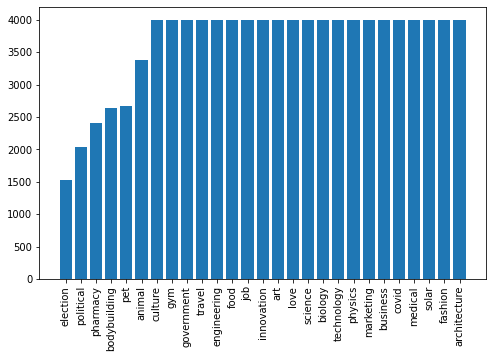

In [160]:
## creating a histogram of topics
labels_list = np.array(list(set(Y)))
labels_hist = np.empty_like(labels_list,dtype=np.int32)
for i,labels in enumerate(labels_list):
  labels_hist[i] = np.sum(Y==labels_list[i])

args = np.argsort(labels_hist)
labels_list = labels_list[args]
labels_hist_prob = labels_hist/np.sum(labels_hist)
plt.figure(figsize=(8,5))
plt.bar(labels_list,np.sort(labels_hist))
plt.xticks(rotation='vertical')
plt.ylabel('topic frequency')
plt.show()

In [171]:
del data_clean
del args

# correlation of features

In [162]:
corr = X.corr()

In [163]:
corr_arr = np.array(corr)
for i in range(len(corr)):
  corr_arr[i,i]=0
index = np.isnan(corr_arr)
if index.sum():
  print(f'{index.sum} of correlation matrix were NaN')
  corr_arr[index]=0
corr_sum = np.mean(np.abs(corr_arr),axis=0)

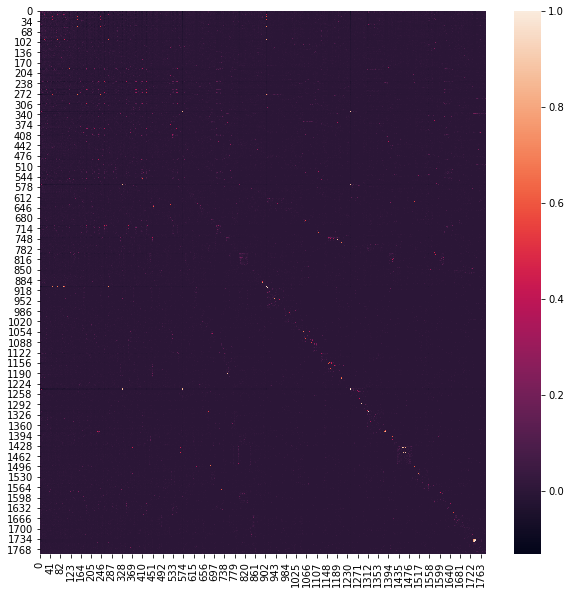

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_arr)

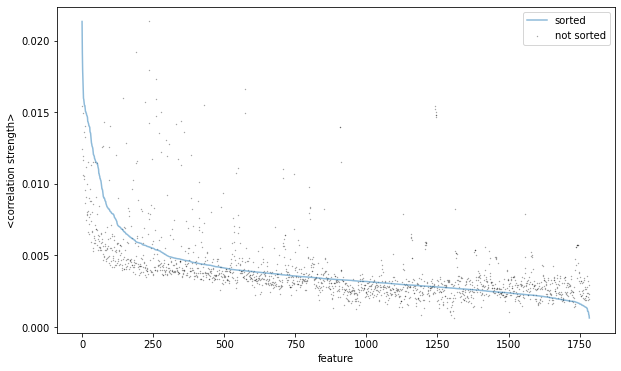

In [167]:
args = np.argsort(corr_sum)
plt.plot(np.flip(np.sort(corr_sum)),alpha=0.5,label = 'sorted')
plt.scatter(np.arange(len(corr_sum)),corr_sum,s=0.1,c='k',alpha=0.5,label = 'not sorted')
plt.xlabel('feature')
plt.ylabel('<correlation strength>')
plt.legend(loc=1)
plt.show()

In [168]:
del corr,corr_arr,corr_sum
del index,args

# feature Information score

In [30]:
## dataFrame to Array
X_array = np.array(X,dtype = bool)
n_s = X_array.shape[0]
n_f = X_array.shape[1]
X_array_fTrue = np.transpose(X_array)
X_array_fFalse = np.invert(X_array_fTrue)

## word frequency

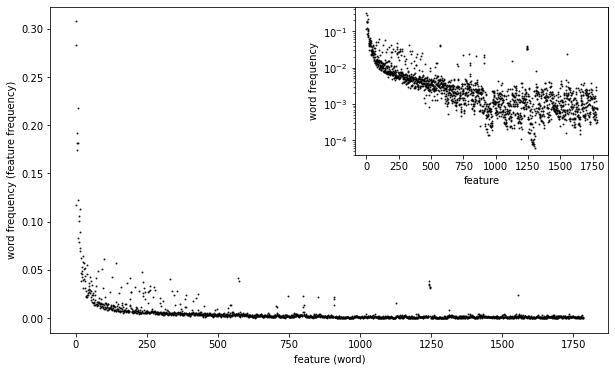

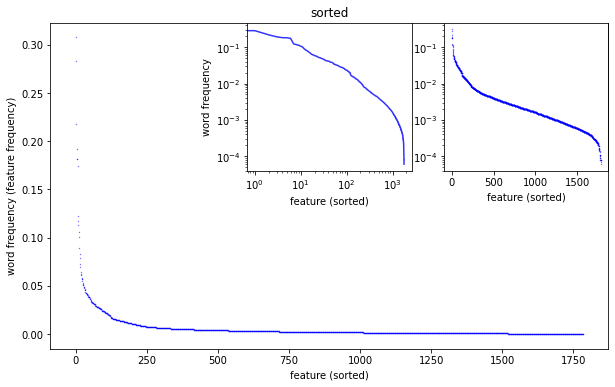

In [185]:
fig = plt.figure()
plt.xlabel('feature (word)')
plt.ylabel("word frequency (feature frequency)")
plt.scatter(range(n_f),np.mean(X_array_fTrue,axis=1),alpha=0.8,s=1,c='k')
ax = fig.add_subplot(222)
plt.xlabel('feature')
plt.ylabel("word frequency")
plt.yscale('log')
plt.scatter(range(n_f),np.mean(X_array_fTrue,axis=1),alpha=0.8,s=1,c='k')
plt.show()
print('\n\n')
fig = plt.figure()
plt.title('sorted')
plt.xlabel('feature (sorted)')
plt.ylabel("word frequency (feature frequency)")
plt.scatter(range(n_f),np.flip(np.sort(np.mean(X_array_fTrue,axis=1))),alpha=0.8,s=0.1,c='b')
ax = fig.add_subplot(233)
plt.xlabel('feature (sorted)')
plt.ylabel("word frequency")
plt.yscale('log')
plt.scatter(range(n_f),np.flip(np.sort(np.mean(X_array_fTrue,axis=1))),alpha=0.8,s=0.1,c='b')

ax = fig.add_subplot(232)
plt.xlabel('feature (sorted)')
plt.ylabel("word frequency")
plt.loglog()
plt.plot(range(n_f),np.flip(np.sort(np.mean(X_array_fTrue,axis=1))),alpha=0.8,c='b')
plt.show()

## Single Feature Information Gain (Linear)

In [186]:
label_id_list = np.arange(len(labels_list))
label_id = np.empty(n_s,dtype=int)
for i,labels in enumerate(labels_list):
  index = Y==labels
  label_id[index] = i
label_bins = label_id_list[-1]+1
label_range = (0,label_id_list[-1]+1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


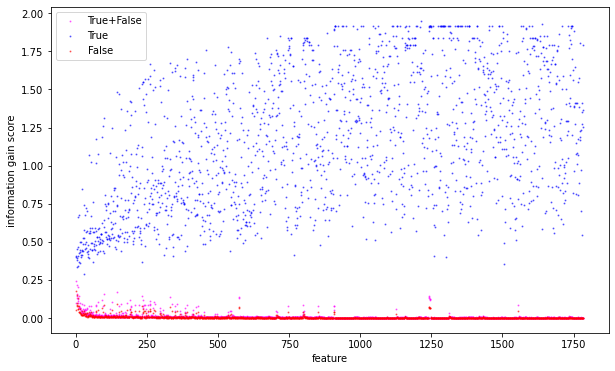

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


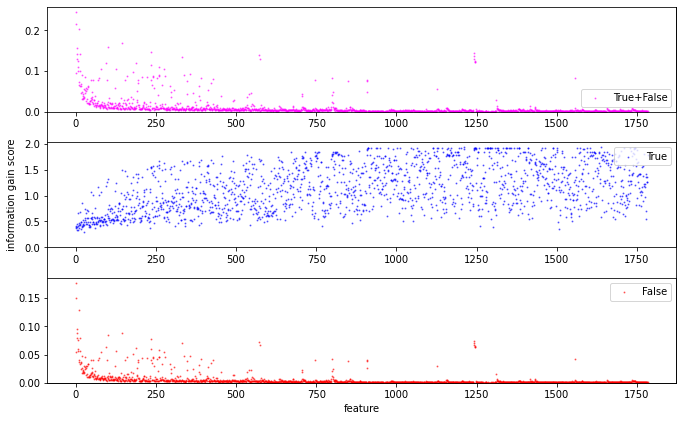

In [188]:
entropy_1 = np.full(n_f,-1,dtype=np.float32)
entropy_1_true = np.full(n_f,-1,dtype=np.float32)
entropy_1_false = np.full(n_f,-1,dtype=np.float32)
for f in range(n_f):
  index = X_array_fTrue[f]    ## tells which samples have 'true' value in 'f'th position of feature vector.
  T_n = index.sum()
  F_n = n_s - T_n
  if T_n and F_n:
    # f_hist = np.zeros_like(labels_hist_prob)
    f_hist = np.float64(np.histogram(label_id[index], bins = label_bins, range=label_range)[0])
    f_hist_false = labels_hist - f_hist
    f_hist/=f_hist.sum()
    f_hist_false/=f_hist_false.sum()
    entropy_1_true[f] = np.sum(np.abs(labels_hist_prob-f_hist))
    entropy_1_false[f] = np.sum(np.abs(labels_hist_prob-f_hist_false))
    entropy_1[f] = (T_n*entropy_1_true[f] + F_n*entropy_1_false[f] )/n_s

fig = plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(range(n_f),entropy_1,c=(1,0,1,0.5),s=1,label='True+False')
ax1.scatter(range(n_f),entropy_1_true,c=(0,0,1,0.5),s=1,label='True')
ax1.scatter(range(n_f),entropy_1_false,c=(1,0,0,0.5),s=1,label='False')
plt.legend(loc=2)
plt.xlabel('feature')
plt.ylabel('information gain score')
plt.show()

fig = plt.figure()
plt.ylabel('information gain score',labelpad =30)
plt.yticks([],[])
plt.xticks([],[])
ax1 = fig.add_subplot(311)
ax1.scatter(range(n_f),entropy_1,c=(1,0,1,0.5),s=1,label='True+False')
plt.legend(loc=4)
plt.ylim(bottom=0)
ax1 = fig.add_subplot(312)
ax1.scatter(range(n_f),entropy_1_true,c=(0,0,1,0.5),s=1,label='True')
plt.legend(loc=1)
plt.ylim(bottom=0)
ax1 = fig.add_subplot(313)
ax1.scatter(range(n_f),entropy_1_false,c=(1,0,0,0.5),s=1,label='False')
plt.legend(loc=1)
plt.ylim(bottom=0)
plt.xlabel('feature')
plt.tight_layout()
plt.show()

## Multi Feature Information Gain (AND NOR XOR)

In [ ]:
from IPython.display import clear_output
try:
  progress = np.load(path+'progress.npy')[0]
except:
  progress = 0
  np.save(path+'progress.npy',progress)
try:
  entropy_2x2_TT = np.load(path+'entropy_2x2_TT.npy')
  entropy_2x2_FF = np.load(path+'entropy_2x2_FF.npy')
  entropy_2x2_TF = np.load(path+'entropy_2x2_TF.npy')
  entropy_2x2_FT = np.load(path+'entropy_2x2_FT.npy')
  entropy_2x2_TT_FF_n= np.load(path+'entropy_2x2_TT_FF_n.npy')
  entropy_2x2_TF_FT_n= np.load(path+'entropy_2x2_TF_FT_n.npy')
  has_entropy_files = True
except:
  entropy_2x2_TT_FF_n = np.zeros((n_f,n_f))
  entropy_2x2_TF_FT_n = np.zeros((n_f,n_f))
  entropy_2x2_TT = np.full((n_f,n_f),-1,dtype=np.float64)
  entropy_2x2_FF = np.full((n_f,n_f),-1,dtype=np.float64)
  entropy_2x2_TF = np.full((n_f,n_f),-1,dtype=np.float64)
  entropy_2x2_FT = np.full((n_f,n_f),-1,dtype=np.float64)
  has_entropy_files = False

### HIDE

Do NOT run the following cell if you have 2D information gain score files.
It would waste your time.

In [ ]:
'''
if not has_entropy_files:
  progress = np.load(path+'progress.npy')[0]

  # entropy_2x2_TT = np.load(path+'entropy_2x2_TT.npy')
  # entropy_2x2_FF = np.load(path+'entropy_2x2_FF.npy')
  # entropy_2x2_TF = np.load(path+'entropy_2x2_TF.npy')
  # entropy_2x2_FT = np.load(path+'entropy_2x2_FT.npy')

  progress0 = progress

  perc = ( progress0**2 )/(n_f**2)*100
  percplus = 200/(n_f-1)**2

  for f in range(progress0,n_f):
    progress = f
    for f2 in range(f):
      perc+=percplus
      ## (True,True)
      index = np.logical_and(X_array_fTrue[f],X_array_fTrue[f2])
      TT_n = index.sum()
      if 0<TT_n<n_s:
        f_hist = np.float64(np.histogram(label_id[index], bins = label_bins, range=label_range)[0])
        f_hist_not = labels_hist - f_hist
        f_hist/=f_hist.sum()
        f_hist_not/=f_hist_not.sum()
        entropy_2x2_TT[f,f2] = np.sum(np.abs(labels_hist_prob-f_hist))
        entropy_2x2_TT[f2,f] = np.sum(np.abs(labels_hist_prob-f_hist_not))

      ## (False,False)
      index = np.logical_and(X_array_fFalse[f],X_array_fFalse[f2])
      FF_n = index.sum()
      if 0<FF_n<n_s:
        f_hist = np.float64(np.histogram(label_id[index], bins = label_bins, range=label_range)[0])
        f_hist_not = labels_hist - f_hist
        f_hist/=f_hist.sum()
        f_hist_not/=f_hist_not.sum()
        entropy_2x2_FF[f,f2] = np.sum(np.abs(labels_hist_prob-f_hist))
        entropy_2x2_FF[f2,f] = np.sum(np.abs(labels_hist_prob-f_hist_not))
      

      ## (True,False)
      index = np.logical_and(X_array_fTrue[f],X_array_fFalse[f2])
      TF_n = index.sum()
      if 0<TF_n<n_s:
        f_hist = np.float64(np.histogram(label_id[index], bins = label_bins, range=label_range)[0])
        f_hist_not = labels_hist - f_hist
        f_hist/=f_hist.sum()
        f_hist_not/=f_hist_not.sum()
        entropy_2x2_TF[f,f2] = np.sum(np.abs(labels_hist_prob-f_hist))
        entropy_2x2_TF[f2,f] = np.sum(np.abs(labels_hist_prob-f_hist_not))

      ## (False,True)
      index = np.logical_and(X_array_fFalse[f],X_array_fTrue[f2])
      FT_n = index.sum()
      if 0<FT_n<n_s:
        f_hist = np.float64(np.histogram(label_id[index], bins = label_bins, range=label_range)[0])
        f_hist_not = labels_hist - f_hist
        f_hist/=f_hist.sum()
        f_hist_not/=f_hist_not.sum()
        entropy_2x2_FT[f,f2] = np.sum(np.abs(labels_hist_prob-f_hist))
        entropy_2x2_FT[f2,f] = np.sum(np.abs(labels_hist_prob-f_hist_not))

      entropy_2x2_TT_FF_n[f,f2] = TT_n
      entropy_2x2_TT_FF_n[f2,f] = FF_n
      entropy_2x2_TF_FT_n[f,f2] = TF_n
      entropy_2x2_TF_FT_n[f2,f] = FT_n
    clear_output()
    print(np.round(perc,1),'%')

    np.save(path+'entropy_2x2_TT.npy',entropy_2x2_TT)
    np.save(path+'entropy_2x2_FF.npy',entropy_2x2_FF)
    np.save(path+'entropy_2x2_TF.npy',entropy_2x2_TF)
    np.save(path+'entropy_2x2_FT.npy',entropy_2x2_FT)

    np.save(path+'entropy_2x2_TT_FF_n.npy',entropy_2x2_TT_FF_n)
    np.save(path+'entropy_2x2_TF_FT_n.npy',entropy_2x2_TF_FT_n)

    np.save(path+'progress.npy',np.array([f]))
'''

### information gain plots

In [ ]:
# sns.heatmap(entropy_2x2_TT)
# plt.show()
# sns.heatmap(entropy_2x2_FF)
# plt.show()
# sns.heatmap(entropy_2x2_TF)
# plt.show()
# sns.heatmap(entropy_2x2_FT)
# plt.show()
# sns.heatmap(entropy_2x2_TT_FF_n)
# plt.show()

In [192]:
print('TT to NOT_TT score similarity (score symmetry)',np.round(100/(np.abs(np.transpose(entropy_2x2_TT)-entropy_2x2_TT).mean()+1),2), '%')
print('FF to NOT_FF score similarity (score symmetry)',np.round(100/(np.abs(np.transpose(entropy_2x2_FF)-entropy_2x2_FF).mean()+1),2), '%')
print('TF to NOT_TF score similarity (score symmetry)',np.round(100/(np.abs(np.transpose(entropy_2x2_TF)-entropy_2x2_TF).mean()+1),2), '%')
print('FT to NOT_FT score similarity (score symmetry)',np.round(100/(np.abs(np.transpose(entropy_2x2_FT)-entropy_2x2_FT).mean()+1),2), '%')
entropy_2x2_AND = np.zeros((n_f,n_f))
entropy_2x2_AND_NOT = np.zeros((n_f,n_f))
entropy_2x2_XOR = np.zeros((n_f,n_f))

for f in range(n_f):
  
  entropy_2x2_AND[f,:f] = entropy_2x2_TT[f,:f]*entropy_2x2_TT_FF_n[f,:f] + np.transpose(entropy_2x2_TT[:f,f])*(n_s-entropy_2x2_TT_FF_n[f,:f])
  entropy_2x2_AND[f,:f]/= n_s
  entropy_2x2_AND[:f,f] = entropy_2x2_AND[f,:f]

  entropy_2x2_AND_NOT[f,:f] = entropy_2x2_FF[f,:f]*entropy_2x2_TT_FF_n[:f,f] + np.transpose(entropy_2x2_FF[:f,f])*(n_s-entropy_2x2_TT_FF_n[:f,f])
  entropy_2x2_AND_NOT[f,:f]/= n_s
  entropy_2x2_AND_NOT[:f,f] = entropy_2x2_AND_NOT[f,:f]

  entropy_2x2_XOR[f,:f] = entropy_2x2_TF[f,:f]*entropy_2x2_TF_FT_n[f,:f] + np.transpose(entropy_2x2_TF[:f,f])*(n_s-entropy_2x2_TF_FT_n[f,:f])
  entropy_2x2_XOR[f,:f]/= n_s
  entropy_2x2_XOR[:f,f] = entropy_2x2_FT[f,:f]*entropy_2x2_TF_FT_n[:f,f] + np.transpose(entropy_2x2_FT[:f,f])*(n_s-entropy_2x2_TF_FT_n[:f,f])
  entropy_2x2_XOR[:f,f]/= n_s
  
  '''

  for f2 in range(f):
    entropy_2x2_AND[f,f2] = (entropy_2x2_TT_FF_n[f,f2]*entropy_2x2_TT[f,f2] + (n_s-entropy_2x2_TT_FF_n[f,f2])*entropy_2x2_TT[f2,f]) / n_s
    entropy_2x2_AND[f2,f] = entropy_2x2_AND[f,f2]
    entropy_2x2_AND_NOT[f,f2] = (entropy_2x2_TT_FF_n[f2,f]*entropy_2x2_FF[f,f2] + (n_s-entropy_2x2_TT_FF_n[f2,f])*entropy_2x2_FF[f2,f]) / n_s
    entropy_2x2_AND_NOT[f2,f] = entropy_2x2_AND_NOT[f,f2]
    entropy_2x2_XOR[f,f2] = (entropy_2x2_TF_FT_n[f,f2]*entropy_2x2_TF[f,f2] + (n_s-entropy_2x2_TF_FT_n[f,f2])*entropy_2x2_TF[f2,f]) / n_s
    entropy_2x2_XOR[f2,f] = (entropy_2x2_TF_FT_n[f2,f]*entropy_2x2_FT[f,f2] + (n_s-entropy_2x2_TF_FT_n[f2,f])*entropy_2x2_FT[f2,f]) / n_s
'''

TT to NOT_TT score similarity (score symmetry) 66.75 %
FF to NOT_FF score similarity (score symmetry) 1.99 %
TF to NOT_TF score similarity (score symmetry) 43.95 %
FT to NOT_FT score similarity (score symmetry) 49.45 %


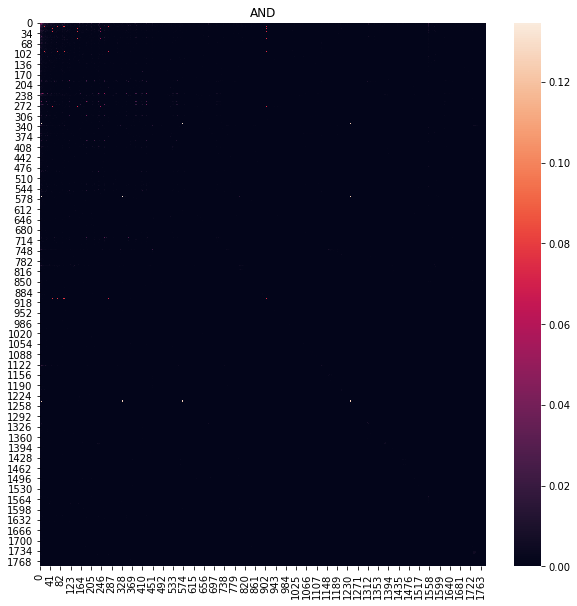

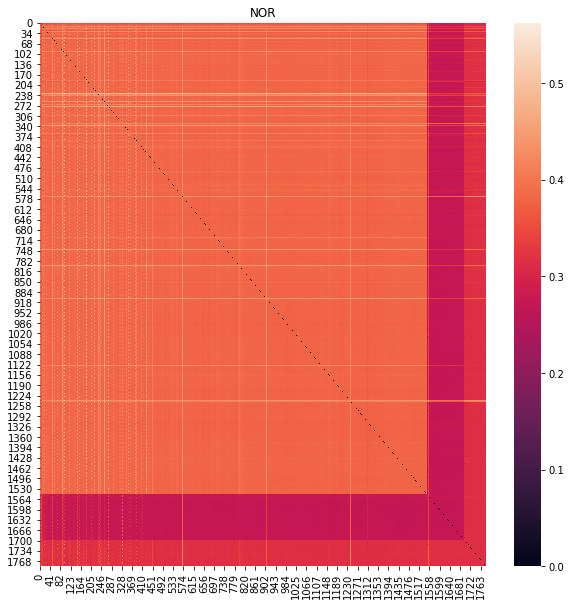

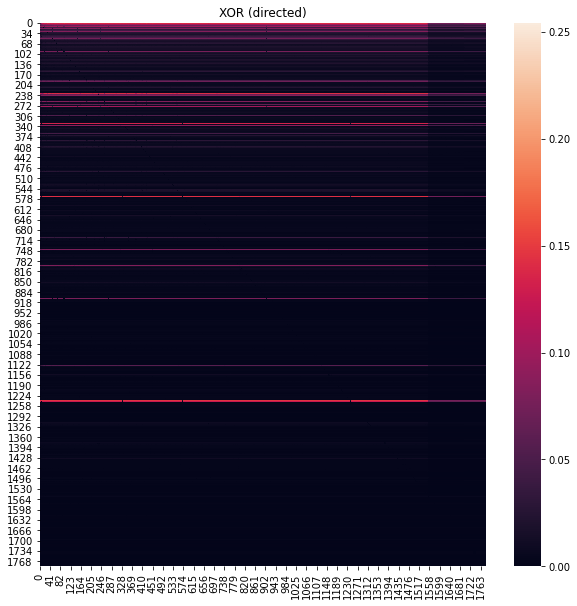

In [193]:
plt.figure(figsize=(10,10))
plt.title('AND')
sns.heatmap(entropy_2x2_AND,vmin=0)
plt.show()
plt.figure(figsize=(10,10))
plt.title('NOR')
sns.heatmap(entropy_2x2_AND_NOT,vmin=0)
plt.show()
plt.figure(figsize=(10,10))
plt.title('XOR (directed)')
sns.heatmap(entropy_2x2_XOR,vmin=0)
plt.show()

XOR (directed) is:

* XOR(A,B){directed} = A & (!B)

### High scores

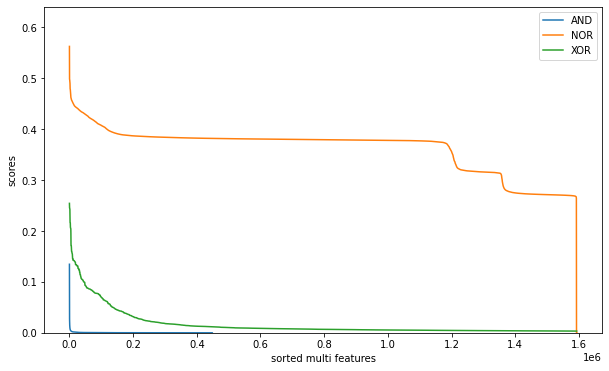

In [202]:
plt.plot(np.flip(np.sort(entropy_2x2_AND.reshape(-1)))[::2],label='AND')
plt.plot(np.flip(np.sort(entropy_2x2_AND_NOT.reshape(-1)))[::2],label='NOR')
plt.plot(np.flip(np.sort(entropy_2x2_XOR.reshape(-1)))[:n_f**2//2:],label = 'XOR')
plt.ylim(bottom=0)
plt.xlabel('sorted multi features')
plt.ylabel('scores')
plt.legend()
plt.show()

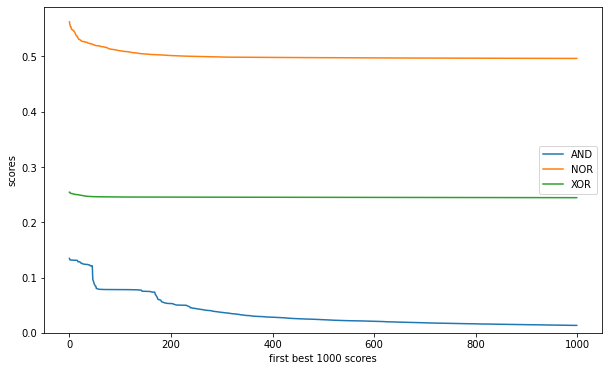

In [203]:
plt.plot(np.flip(np.sort(entropy_2x2_AND.reshape(-1)))[:2000:2],label='AND')
plt.plot(np.flip(np.sort(entropy_2x2_AND_NOT.reshape(-1)))[:2000:2],label='NOR')
plt.plot(np.flip(np.sort(entropy_2x2_XOR.reshape(-1)))[:1000],label = 'XOR')
plt.ylim(bottom=0)
plt.xlabel('first best 1000 scores')
plt.ylabel('scores')
plt.legend()
plt.show()

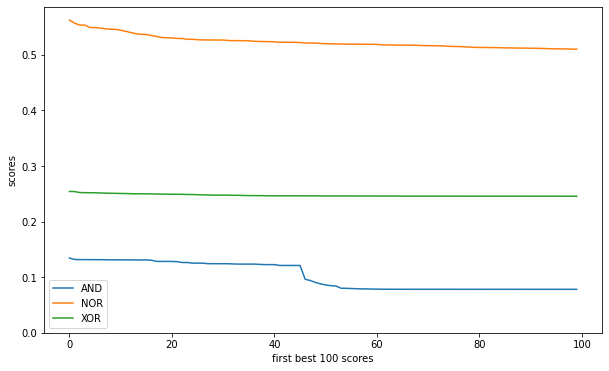

In [204]:
plt.plot(np.flip(np.sort(entropy_2x2_AND.reshape(-1)))[:200:2],label='AND')
plt.plot(np.flip(np.sort(entropy_2x2_AND_NOT.reshape(-1)))[:200:2],label='NOR')
plt.plot(np.flip(np.sort(entropy_2x2_XOR.reshape(-1)))[:100],label = 'XOR')
plt.ylim(bottom=0)
plt.xlabel('first best 100 scores')
plt.ylabel('scores')
plt.legend()
plt.show()

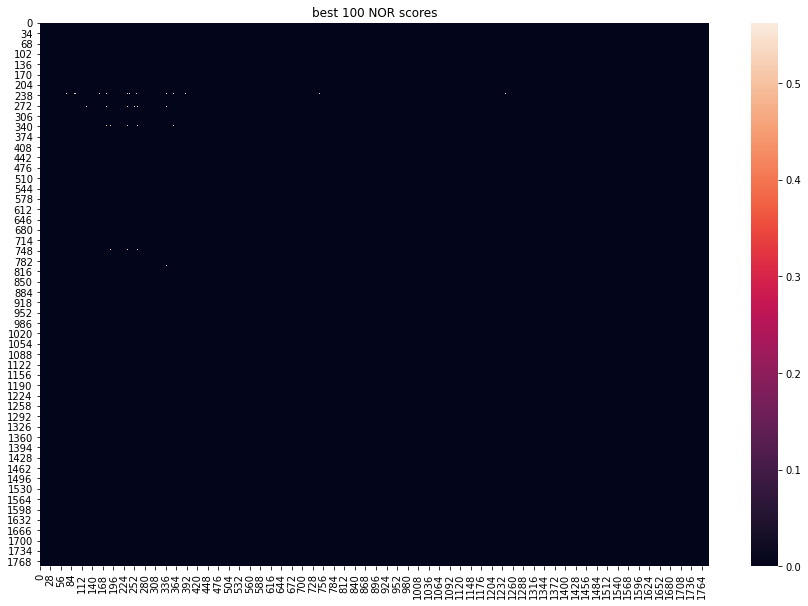

In [208]:
plt.figure(figsize=(15,10))
NOR_lim = np.flip(np.sort(entropy_2x2_AND_NOT.reshape(-1)))[200]
index = entropy_2x2_AND_NOT>NOR_lim
plt.title('best 100 NOR scores')
sns.heatmap(entropy_2x2_AND_NOT*index,vmin=0)

In [ ]:
n_extra = 100

In [132]:
index_1D = np.flip( np.argsort(entropy_2x2_AND_NOT.reshape(-1)) )[:2*n_extra:2]
x_p = np.empty(len(index_1D),dtype=int)
y_p = np.empty(len(index_1D),dtype=int)
for i,ind in enumerate(index_1D):
  x_p[i] = ind//n_f
  y_p[i] = ind%n_f
extra_NOR = np.empty((n_s,n_extra),dtype=bool)
for i in range(n_extra):
  extra_NOR[:,i] = np.logical_and(X_array_fFalse[x_p[i]],X_array_fFalse[y_p[i]])

In [142]:
index_1D = np.flip( np.argsort(entropy_2x2_AND.reshape(-1)) )[:2*n_extra:2]
x_p = np.empty(len(index_1D),dtype=int)
y_p = np.empty(len(index_1D),dtype=int)
for i,ind in enumerate(index_1D):
  x_p[i] = ind//n_f
  y_p[i] = ind%n_f
extra_AND = np.empty((n_s,n_extra),dtype=bool)
for i in range(n_extra):
  extra_AND[:,i] = np.logical_and(X_array_fTrue[x_p[i]],X_array_fTrue[y_p[i]])

In [144]:
index_1D = np.flip( np.argsort(entropy_2x2_XOR.reshape(-1)) )[:n_extra]
x_p = np.empty(len(index_1D),dtype=int)
y_p = np.empty(len(index_1D),dtype=int)
for i,ind in enumerate(index_1D):
  x_p[i] = ind//n_f
  y_p[i] = ind%n_f
extra_XOR = np.empty((n_s,n_extra),dtype=bool)
for i in range(n_extra):
  extra_XOR[:,i] = np.logical_and(X_array_fTrue[x_p[i]],X_array_fFalse[y_p[i]])

In [145]:
np.save(path+'extra_XOR',extra_XOR)
np.save(path+'extra_AND',extra_AND)
np.save(path+'extra_NOR',extra_NOR)

In [216]:
np.save(path+'best_IGS_index.npy',np.flip(np.argsort(entropy_1)))